In [28]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [29]:
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
print('The number of passengers in original data is {}'.format(train_df.shape[0]))

The number of passengers in original data is 891


##Analyzing Data

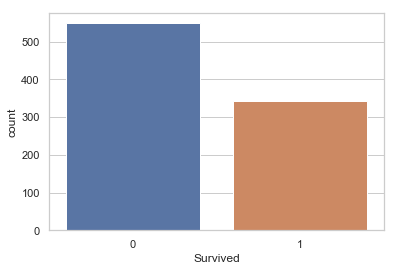

In [31]:
sns.countplot(x = "Survived", data=train_df)

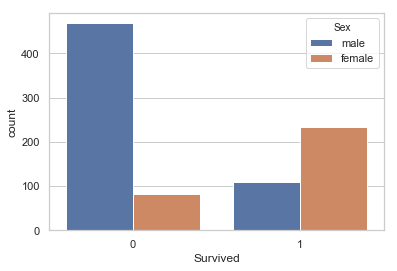

In [32]:
sns.countplot(x = "Survived", hue = "Sex", data = train_df)

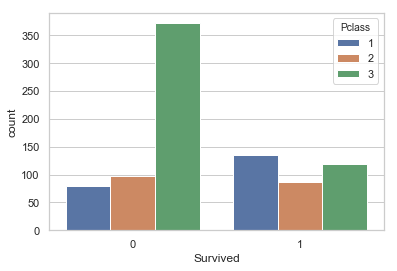

In [33]:
sns.countplot(x = "Survived", hue = "Pclass", data=train_df)

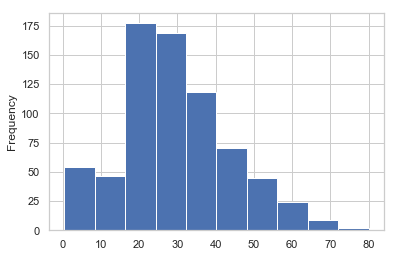

In [34]:
train_df["Age"].plot.hist()

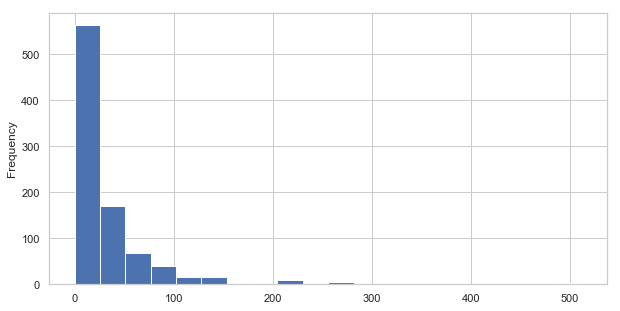

In [35]:
train_df["Fare"].plot.hist(bins=20,figsize=(10,5))

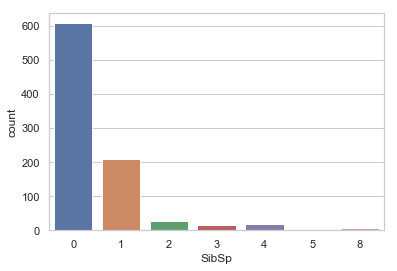

In [36]:
sns.countplot(x="SibSp", data=train_df)

##Data Wrangling

In [37]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

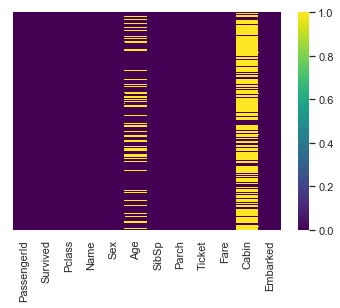

In [38]:
sns.heatmap(train_df.isnull(),yticklabels=False, cmap="viridis")

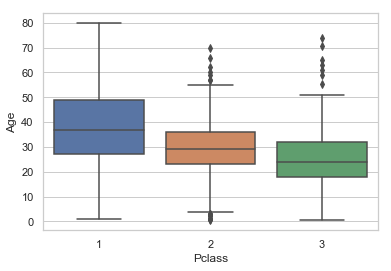

In [39]:
sns.boxplot(x="Pclass", y="Age", data=train_df)

In [40]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train_df.drop("Cabin",axis=1,inplace=True)

In [42]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
train_df.dropna(inplace=True)

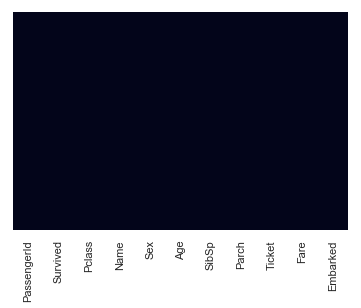

In [44]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [45]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
sex=pd.get_dummies(train_df["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [47]:
embark = pd.get_dummies(train_df["Embarked"], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
Pcl = pd.get_dummies(train_df["Pclass"], drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [49]:
train_df = pd.concat([train_df,sex,embark,Pcl],axis=1)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [54]:
Titanic_data_1 = pd.read_csv("Titanic_data_1.csv")
Titanic_data_1.drop('Unnamed: 0',axis=1,inplace=True)

In [55]:
Titanic_data_1.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


##Train Data

In [56]:
X = Titanic_data_1.drop("Survived",axis=1)
Y = Titanic_data_1["Survived"]

In [57]:
from sklearn.cross_validation import train_test_split

/Users/aniketmuluk/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.33,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
prediction=logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       136
          1       0.77      0.70      0.73        99

avg / total       0.78      0.78      0.78       235



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(Y_test, prediction)

array([[115,  21],
       [ 30,  69]])

In [70]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(Y_test, prediction)

0.7829787234042553

In [73]:
print(prediction)

[1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 1]


In [74]:
len(prediction)

235